Loaded data for 403 posts.
Error loading C:\git\SocialReporter\data\ethzurich\C04Fy4zqy_I\C04Fy4zqy_I_0-cta-img-loc.json: [Errno 2] No such file or directory: 'C:\\git\\SocialReporter\\data\\ethzurich\\C04Fy4zqy_I\\C04Fy4zqy_I_0-cta-img-loc.json'
Error loading C:\git\SocialReporter\data\ethzurich\C04Fy4zqy_I\C04Fy4zqy_I_1-cta-img-loc.json: [Errno 2] No such file or directory: 'C:\\git\\SocialReporter\\data\\ethzurich\\C04Fy4zqy_I\\C04Fy4zqy_I_1-cta-img-loc.json'
Error loading C:\git\SocialReporter\data\ethzurich\C06e98eqE_2\C06e98eqE_2_0-cta-img-loc.json: [Errno 2] No such file or directory: 'C:\\git\\SocialReporter\\data\\ethzurich\\C06e98eqE_2\\C06e98eqE_2_0-cta-img-loc.json'
Error loading C:\git\SocialReporter\data\ethzurich\C06e98eqE_2\C06e98eqE_2_1-cta-img-loc.json: [Errno 2] No such file or directory: 'C:\\git\\SocialReporter\\data\\ethzurich\\C06e98eqE_2\\C06e98eqE_2_1-cta-img-loc.json'
Error loading C:\git\SocialReporter\data\ethzurich\C06e98eqE_2\C06e98eqE_2_2-cta-img-loc.json

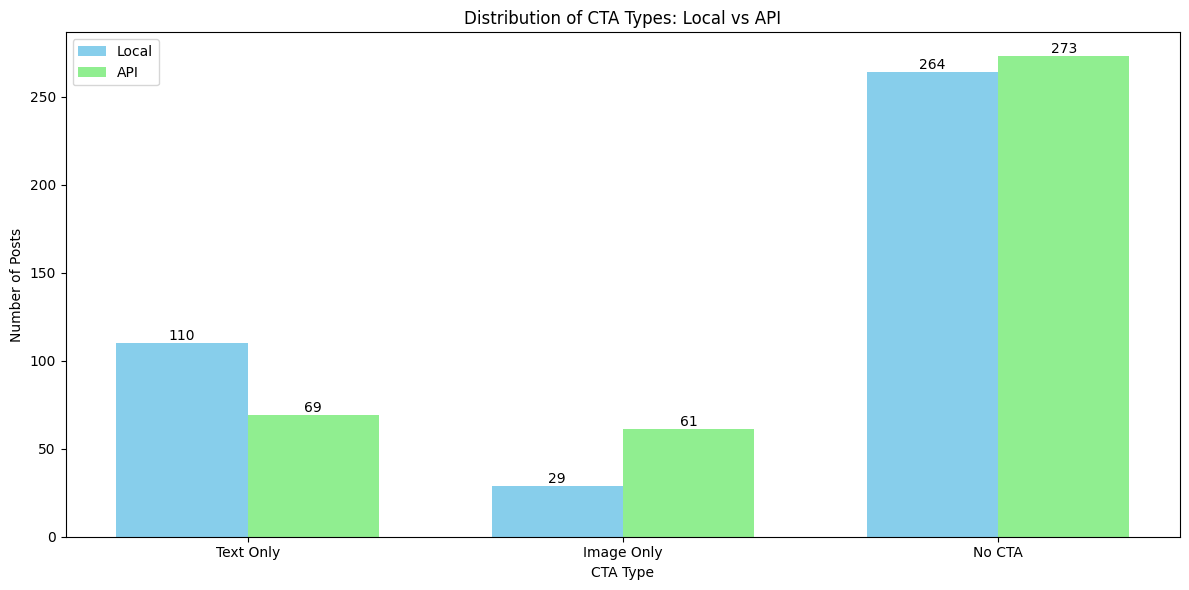

Prozentuale Verteilung der CTA-Typen:

Lokal:
local_cta_category
No CTA        65.508685
Text Only     27.295285
Image Only     7.196030
Name: count, dtype: float64

API:
api_cta_category
No CTA        67.741935
Text Only     17.121588
Image Only    15.136476
Name: count, dtype: float64


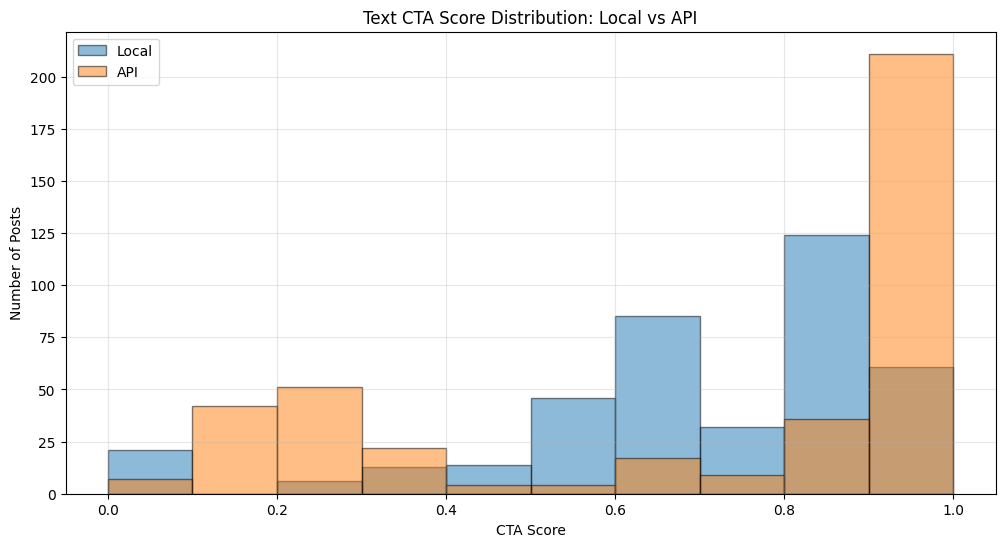

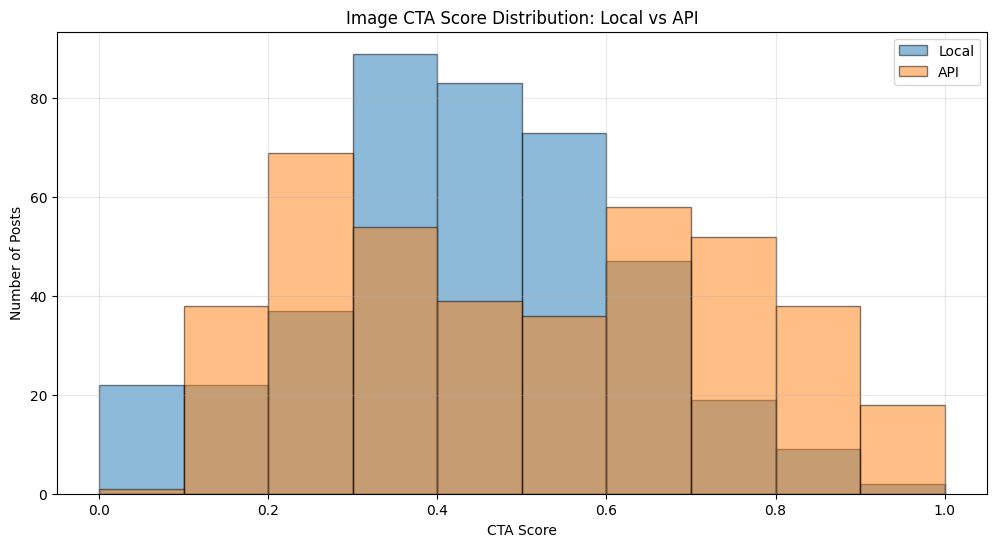


Text CTA Score Statistics:
       text_cta_local_score  text_cta_api_score
count            403.000000          403.000000
mean               0.670471            0.673201
std                0.473262            0.351863
min                0.000000            0.000000
25%                0.600000            0.300000
50%                0.700000            0.900000
75%                0.800000            1.000000
max                9.000000            1.000000

Image CTA Score Statistics:
       avg_local_image_cta_score  avg_api_image_cta_score
count                 403.000000               403.000000
mean                    0.405927                 0.478619
std                     0.185914                 0.240669
min                     0.000000                 0.050000
25%                     0.300000                 0.250000
50%                     0.400000                 0.500000
75%                     0.500000                 0.700000
max                     0.900000               

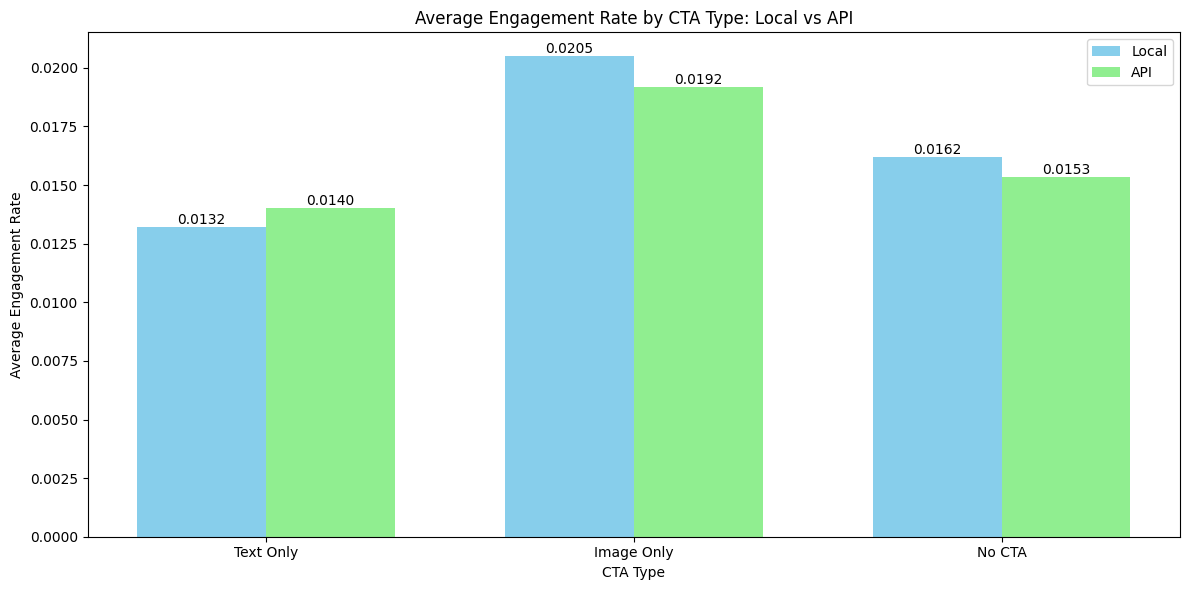


Durchschnittliche Engagement-Rate nach CTA-Typ:

Lokal:
local_cta_category
Image Only    0.020492
No CTA        0.016206
Text Only     0.013206
Name: engagement_rate, dtype: float64

API:
api_cta_category
Image Only    0.019167
No CTA        0.015346
Text Only     0.014009
Name: engagement_rate, dtype: float64

Prozentuale Veränderung der Engagement-Rate im Vergleich zu 'No CTA':

Lokal:
Image Only: 26.45%
No CTA: 0.00%
Text Only: -18.51%

API:
Image Only: 24.89%
No CTA: 0.00%
Text Only: -8.72%

Statistische Tests (t-Test) für Engagement-Rate-Unterschiede:

Lokal:
Text Only vs No CTA: t-statistic = -2.1116, p-value = 0.0354
Image Only vs No CTA: t-statistic = 1.5902, p-value = 0.1129

API:
Text Only vs No CTA: t-statistic = -0.7827, p-value = 0.4343
Image Only vs No CTA: t-statistic = 2.0338, p-value = 0.0428


In [9]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

#Threshold
Threshold = 0.5

# Einfacher Stil für Matplotlib
plt.style.use('default')

# Define the path to our data
root_directory = r'C:\git\SocialReporter\data'
relevant_files_path = os.path.join(root_directory, 'relevant_cta_files.json')

# Load the relevant files data
with open(relevant_files_path, 'r') as f:
    relevant_files = json.load(f)

print(f"Loaded data for {len(relevant_files)} posts.")

# Function to find the correct subfolder
def find_subfolder(root_dir, post_id):
    for subdir in os.listdir(root_dir):
        if os.path.isdir(os.path.join(root_dir, subdir)):
            if post_id in os.listdir(os.path.join(root_dir, subdir)):
                return os.path.join(root_dir, subdir, post_id)
    return None

# Function to load JSON file
def load_json_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            return json.load(f)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Erstellen des DataFrames für Post-Level-Daten
post_data = []

for post_id, data in relevant_files.items():
    subfolder = find_subfolder(root_directory, post_id)
    if subfolder is None:
        print(f"Subfolder not found for post {post_id}")
        continue
    
    # Laden der Original-Post-Daten
    original_post_data = load_json_file(os.path.join(subfolder, f"{post_id}.json"))
    if original_post_data is None:
        continue

    # Laden der Text-CTA-Daten (lokal und API)
    text_cta_local_file = os.path.join(subfolder, f"{post_id}-cta-txt-loc.json")
    text_cta_api_file = os.path.join(subfolder, f"{post_id}-cta-txt.json")
    text_cta_local_data = load_json_file(text_cta_local_file)
    text_cta_api_data = load_json_file(text_cta_api_file)

    # Berechnung der Engagement-Rate
    likes = original_post_data.get('likes', 0)
    comments_count = len(original_post_data.get('comments', []))
    follower_count = original_post_data.get('follower_count', 1)  # Vermeidung von Division durch Null
    engagement_rate = (likes + comments_count) / follower_count if follower_count > 0 else 0

    post_info = {
        'post_id': post_id,
        'likes': likes,
        'comments_count': comments_count,
        'follower_count': follower_count,
        'engagement_rate': engagement_rate,
        'text_cta_local_score': text_cta_local_data.get('cta_txt_loc_score', 0) if text_cta_local_data else 0,
        'text_cta_api_score': text_cta_api_data.get('cta_txt_score', 0) if text_cta_api_data else 0,
        'has_text_cta_local': text_cta_local_data.get('cta_txt_loc_score', 0) >= Threshold if text_cta_local_data else False,
        'has_text_cta_api': text_cta_api_data.get('cta_txt_score', 0) >= Threshold if text_cta_api_data else False
    }

    # Verarbeitung der Bild-CTA-Daten
    local_image_cta_scores = []
    api_image_cta_scores = []
    for img in data['images']:
        local_cta_file = os.path.join(subfolder, f"{img.split('.')[0]}-cta-img-loc.json")
        api_cta_file = os.path.join(subfolder, f"{img.split('.')[0]}-cta-img.json")
        
        local_cta_data = load_json_file(local_cta_file)
        api_cta_data = load_json_file(api_cta_file)
        
        local_score = local_cta_data.get('cta_img_loc_score', 0) if local_cta_data else 0
        api_score = api_cta_data.get('cta_img_score', 0) if api_cta_data else 0
        
        local_image_cta_scores.append(local_score)
        api_image_cta_scores.append(api_score)
    
    post_info['avg_local_image_cta_score'] = sum(local_image_cta_scores) / len(local_image_cta_scores) if local_image_cta_scores else 0
    post_info['avg_api_image_cta_score'] = sum(api_image_cta_scores) / len(api_image_cta_scores) if api_image_cta_scores else 0
    post_info['has_local_image_cta'] = any(score >= Threshold for score in local_image_cta_scores)
    post_info['has_api_image_cta'] = any(score >= Threshold for score in api_image_cta_scores)

    post_data.append(post_info)

df_posts = pd.DataFrame(post_data)

# Angepasste Funktion zur Kategorisierung der CTA-Typen
def categorize_cta(row, text_col, image_col):
    has_text_cta = row[text_col] > Threshold
    has_image_cta = row[image_col] > Threshold
    if row[text_col] and not row[image_col]:
        return 'Text Only'
    elif row[image_col] and not row[text_col]:
        return 'Image Only'
    else:
        return 'No CTA'

# CTA-Kategorien erstellen
df_posts['local_cta_category'] = df_posts.apply(lambda row: categorize_cta(row, 'has_text_cta_local', 'has_local_image_cta'), axis=1)
df_posts['api_cta_category'] = df_posts.apply(lambda row: categorize_cta(row, 'has_text_cta_api', 'has_api_image_cta'), axis=1)

# Zählen der Beiträge für jede Kategorie
local_counts = df_posts['local_cta_category'].value_counts()
api_counts = df_posts['api_cta_category'].value_counts()

# Erstellen eines DataFrames für die Visualisierung
plot_data = pd.DataFrame({
    'Local': local_counts,
    'API': api_counts
})

# Sortieren der Kategorien in einer spezifischen Reihenfolge (ohne 'Both')
category_order = ['Text Only', 'Image Only', 'No CTA']
plot_data = plot_data.reindex(category_order)

# Erstellen der Visualisierung für CTA-Typen-Verteilung
plt.figure(figsize=(12, 6))
x = range(len(category_order))
width = 0.35

plt.bar([i - width/2 for i in x], plot_data['Local'], width, label='Local', color='skyblue')
plt.bar([i + width/2 for i in x], plot_data['API'], width, label='API', color='lightgreen')

plt.xlabel('CTA Type')
plt.ylabel('Number of Posts')
plt.title('Distribution of CTA Types: Local vs API')
plt.xticks(x, category_order)
plt.legend()

for i, v in enumerate(plot_data['Local']):
    plt.text(i - width/2, v, str(v), ha='center', va='bottom')
for i, v in enumerate(plot_data['API']):
    plt.text(i + width/2, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Ausgabe der prozentualen Verteilung
print("Prozentuale Verteilung der CTA-Typen:")
print("\nLokal:")
print(local_counts / len(df_posts) * 100)
print("\nAPI:")
print(api_counts / len(df_posts) * 100)

# Funktion zur Erstellung der Histogramme für CTA-Score-Verteilung
def create_cta_score_distribution(df, local_col, api_col, title):
    plt.figure(figsize=(12, 6))
    
    bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    
    plt.hist(df[local_col], bins=bins, alpha=0.5, label='Local', edgecolor='black')
    plt.hist(df[api_col], bins=bins, alpha=0.5, label='API', edgecolor='black')
    
    plt.title(title)
    plt.xlabel('CTA Score')
    plt.ylabel('Number of Posts')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Erstellen der Histogramme
create_cta_score_distribution(df_posts, 'text_cta_local_score', 'text_cta_api_score', 'Text CTA Score Distribution: Local vs API')
create_cta_score_distribution(df_posts, 'avg_local_image_cta_score', 'avg_api_image_cta_score', 'Image CTA Score Distribution: Local vs API')

# Zusätzliche statistische Informationen
print("\nText CTA Score Statistics:")
print(df_posts[['text_cta_local_score', 'text_cta_api_score']].describe())

print("\nImage CTA Score Statistics:")
print(df_posts[['avg_local_image_cta_score', 'avg_api_image_cta_score']].describe())

# Korrelation zwischen lokalen und API Scores
text_correlation = df_posts['text_cta_local_score'].corr(df_posts['text_cta_api_score'])
image_correlation = df_posts['avg_local_image_cta_score'].corr(df_posts['avg_api_image_cta_score'])

print(f"\nCorrelation between Local and API Text CTA Scores: {text_correlation:.4f}")
print(f"Correlation between Local and API Image CTA Scores: {image_correlation:.4f}")

# Funktion zur Berechnung der durchschnittlichen Engagement-Rate für jede CTA-Kategorie
def calculate_avg_engagement(df, cta_column):
    return df.groupby(cta_column)['engagement_rate'].mean()

# Berechnung der durchschnittlichen Engagement-Rates
local_engagement = calculate_avg_engagement(df_posts, 'local_cta_category')
api_engagement = calculate_avg_engagement(df_posts, 'api_cta_category')

# Erstellung des Balkendiagramms für Engagement-Rates
plt.figure(figsize=(12, 6))
x = range(len(category_order))
width = 0.35

plt.bar([i - width/2 for i in x], [local_engagement.get(cat, 0) for cat in category_order], width, label='Local', color='skyblue')
plt.bar([i + width/2 for i in x], [api_engagement.get(cat, 0) for cat in category_order], width, label='API', color='lightgreen')

plt.xlabel('CTA Type')
plt.ylabel('Average Engagement Rate')
plt.title('Average Engagement Rate by CTA Type: Local vs API')
plt.xticks(x, category_order)
plt.legend()

for i, v in enumerate([local_engagement.get(cat, 0) for cat in category_order]):
    plt.text(i - width/2, v, f'{v:.4f}', ha='center', va='bottom')
for i, v in enumerate([api_engagement.get(cat, 0) for cat in category_order]):
    plt.text(i + width/2, v, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Ausgabe der durchschnittlichen Engagement-Rates
print("\nDurchschnittliche Engagement-Rate nach CTA-Typ:")
print("\nLokal:")
print(local_engagement)
print("\nAPI:")
print(api_engagement)

# Berechnung der prozentualen Veränderung im Vergleich zu 'No CTA'
def calculate_percentage_change(engagement_rates):
    no_cta_rate = engagement_rates.get('No CTA', 0)
    return {cat: (rate / no_cta_rate - 1) * 100 if no_cta_rate != 0 else 0 
            for cat, rate in engagement_rates.items()}

local_percentage_change = calculate_percentage_change(local_engagement)
api_percentage_change = calculate_percentage_change(api_engagement)

print("\nProzentuale Veränderung der Engagement-Rate im Vergleich zu 'No CTA':")
print("\nLokal:")
for cat, change in local_percentage_change.items():
    print(f"{cat}: {change:.2f}%")

print("\nAPI:")
for cat, change in api_percentage_change.items():
    print(f"{cat}: {change:.2f}%")

# Statistische Tests
def perform_ttest(df, cta_column):
    cta_groups = df.groupby(cta_column)['engagement_rate']
    no_cta = cta_groups.get_group('No CTA')
    
    results = {}
    for category in ['Text Only', 'Image Only']:
        if category in cta_groups.groups:
            t_stat, p_value = stats.ttest_ind(cta_groups.get_group(category), no_cta)
            results[category] = {'t_statistic': t_stat, 'p_value': p_value}
    
    return results

print("\nStatistische Tests (t-Test) für Engagement-Rate-Unterschiede:")
print("\nLokal:")
local_ttest_results = perform_ttest(df_posts, 'local_cta_category')
for category, result in local_ttest_results.items():
    print(f"{category} vs No CTA: t-statistic = {result['t_statistic']:.4f}, p-value = {result['p_value']:.4f}")

print("\nAPI:")
api_ttest_results = perform_ttest(df_posts, 'api_cta_category')
for category, result in api_ttest_results.items():
    print(f"{category} vs No CTA: t-statistic = {result['t_statistic']:.4f}, p-value = {result['p_value']:.4f}")